In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [3]:
def sentiment_dict(fp):
    scores_dict = {}
    sf = open(fp)
    for line in sf:
        word,score = line.split("\t")
        scores_dict[word] = int(score)
    sf.close()
    return scores_dict

In [8]:
def tweet_score(tf_dict,scores_dict):
    final_score = []
    for line in tweets:
        tweet_score = 0
        for word in line.split():
            if word in scores_dict.keys():
                tweet_score += scores_dict[word]
        final_score.append(tweet_score)
    return final_score

In [11]:
def sentiment_df(tweets_csv,score):
    sentiment_df = pd.DataFrame(
    {'year': tweets_csv['year'].values,
     'score': score,
    })
    sentiments = sentiment_df.groupby('year')['score'].mean().reset_index()
    sentiments['year'] = sentiments['year'].astype(int)
    return sentiments

In [23]:
def plot_sentiment(sentiments_df):
    plt.style.use('seaborn-white')
    fig,ax= plt.subplots(nrows=1)
    ax.plot(sentiments['year'],sentiments['score'], color = '#1DA1F2',marker='o',linewidth=2)
    ax.set_title('Sentiment by Year',fontsize=24,fontweight='bold')
    ax.set_xlabel('Year',fontsize=18)
    ax.set_ylabel('Average Sentiment',fontsize=18)
    plt.yticks(fontsize=16,fontstyle='italic')
    plt.xticks(sentiments['year'],fontsize=16,fontstyle='italic')
    fig.set_size_inches(16,10)
    return

In [13]:
scores_dict = sentiment_dict('AFINN-111.txt')

In [15]:
tweets_df = pd.read_csv('tweets.csv')

In [16]:
tweets_df['year'] = pd.to_datetime(tweets_df['timestamp']).dt.year

In [17]:
tweets = []

for text in tweets_df['text']:
    tweets.append(text)

In [18]:
score = tweet_score(tweets,scores_dict)

In [19]:
sentiments = sentiment_df(tweets_df,score)

In [29]:
sent = plot_sentiment(sentiments)

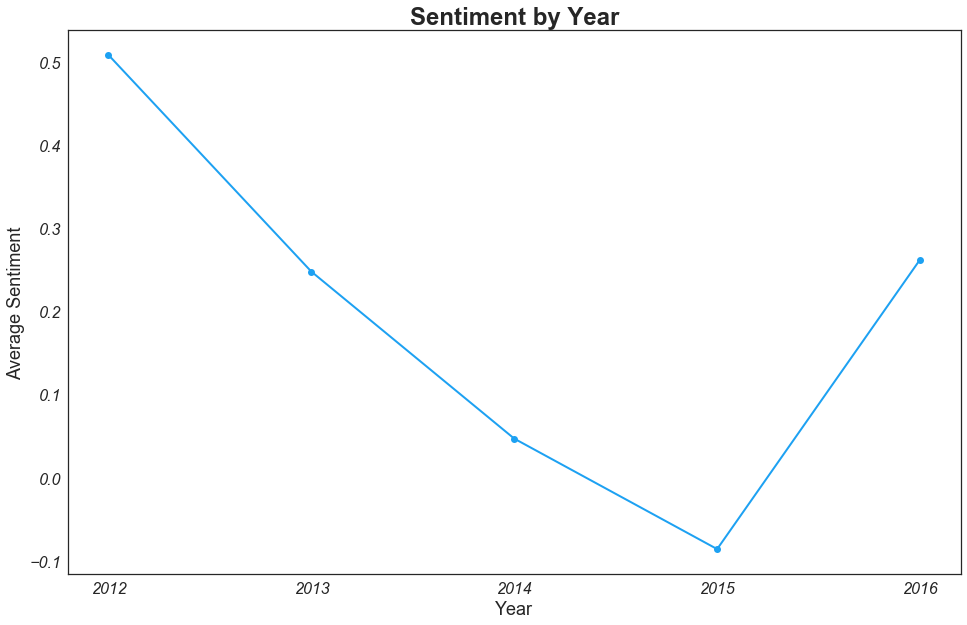

In [25]:
plt.show()